In [ ]:
!pip install Pillow
from PIL import Image
from io import BytesIO
import requests

# Lab Overview

- Variables and their different types.
- Measures of central tendency.
- Types of statistical tests and when to use them.
  - T-test
  - Analysis of Variance
  - Correlation
  - Linear Regression
  - Logistic Regression

# Variables

- a variable is a characteristic or attribute that can vary or change
- value, number, or quantity that can be measured
- allows us to understand relationships

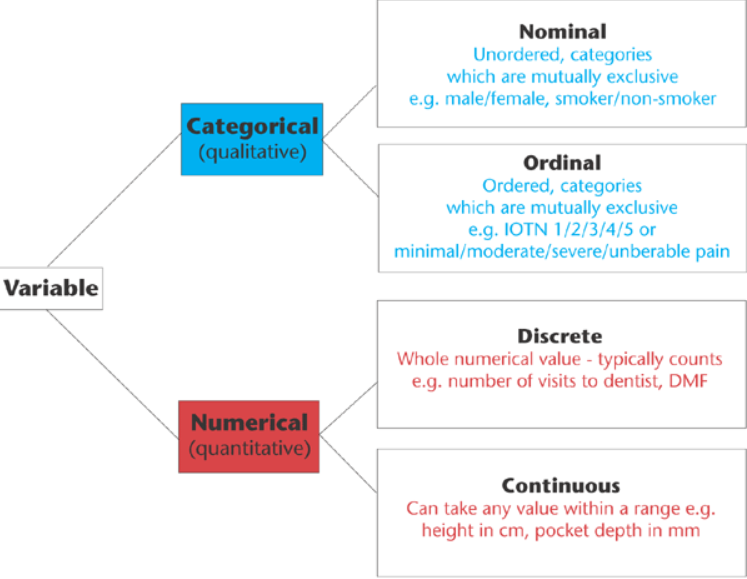

In [ ]:
Image.open(BytesIO(requests.get("https://lh3.googleusercontent.com/ouaZ3rY3a2NL356W3kDyYr5HTBFFMzSVK2QSQmptX4oMWmH5rmiBix3RIu-aZ9ptEZZUcKkDhN2A7BmPKgs_bCN6raFf5Car4CxHKsPqu_rmB5f-engm9BsHnTyR2rgLmxCSgq9s").content))

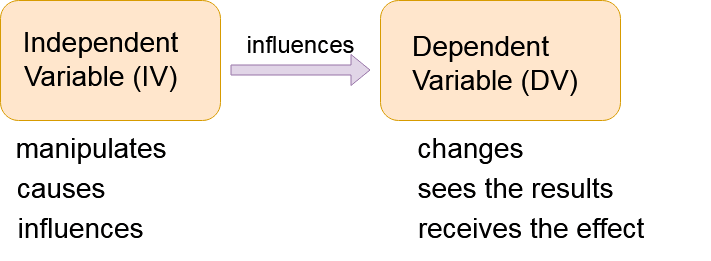

In [ ]:
Image.open(BytesIO(requests.get("https://www.classgist.com/uploads/e4ac84fd-28ad-42b9-a856-9de8fb48b5ab.png").content))

# Research Question & Hypothesis

Ask questions or make predictions about the relationships between variables

**Hypotheses are useful if...**
*   There is an established line of research.
*   A likely outcome can be anticipated in advance.
*   Testing a specific theory or model.

Hypotheses can be less flexible and can blind a researcher to unanticipated results.

**Research Questions are useful if...**

*   there is little to no previous research on the topic.

Research questions allow researchers to conduct more open-ended inquiries which can provide a wider range of outcomes. However, this can encourage manipulation of the findings (e.g., "fishing expeditions").

## Examples
- **Research Question:** How does exposure to violent video games influence aggressive behavior in adolescents?
- **Hypothesis:** Adolescents who are exposed to violent video games will exhibit higher levels of aggressive behavior compared to those who are not exposed.
- **Research Question:** How does media portrayal of body image impact self-esteem and body dissatisfaction among teenagers?
- **Hypothesis:** Teenagers who are exposed to idealized and unrealistic body images in the media will have lower self-esteem and higher levels of body dissatisfaction compared to those who are not exposed.

"College students who spend more time on social media platforms will report lower levels of face-to-face social interactions and lower satisfaction with their interpersonal relationships compared to those who use social media less frequently."

Answer the following questions
- Is this statement a research question or a hypothesis?
- How many variables are in this statement?
- What is the types of the variables?

# Measures of Central Tendency

They are summary measures that describe the middle or center of the data distribution. 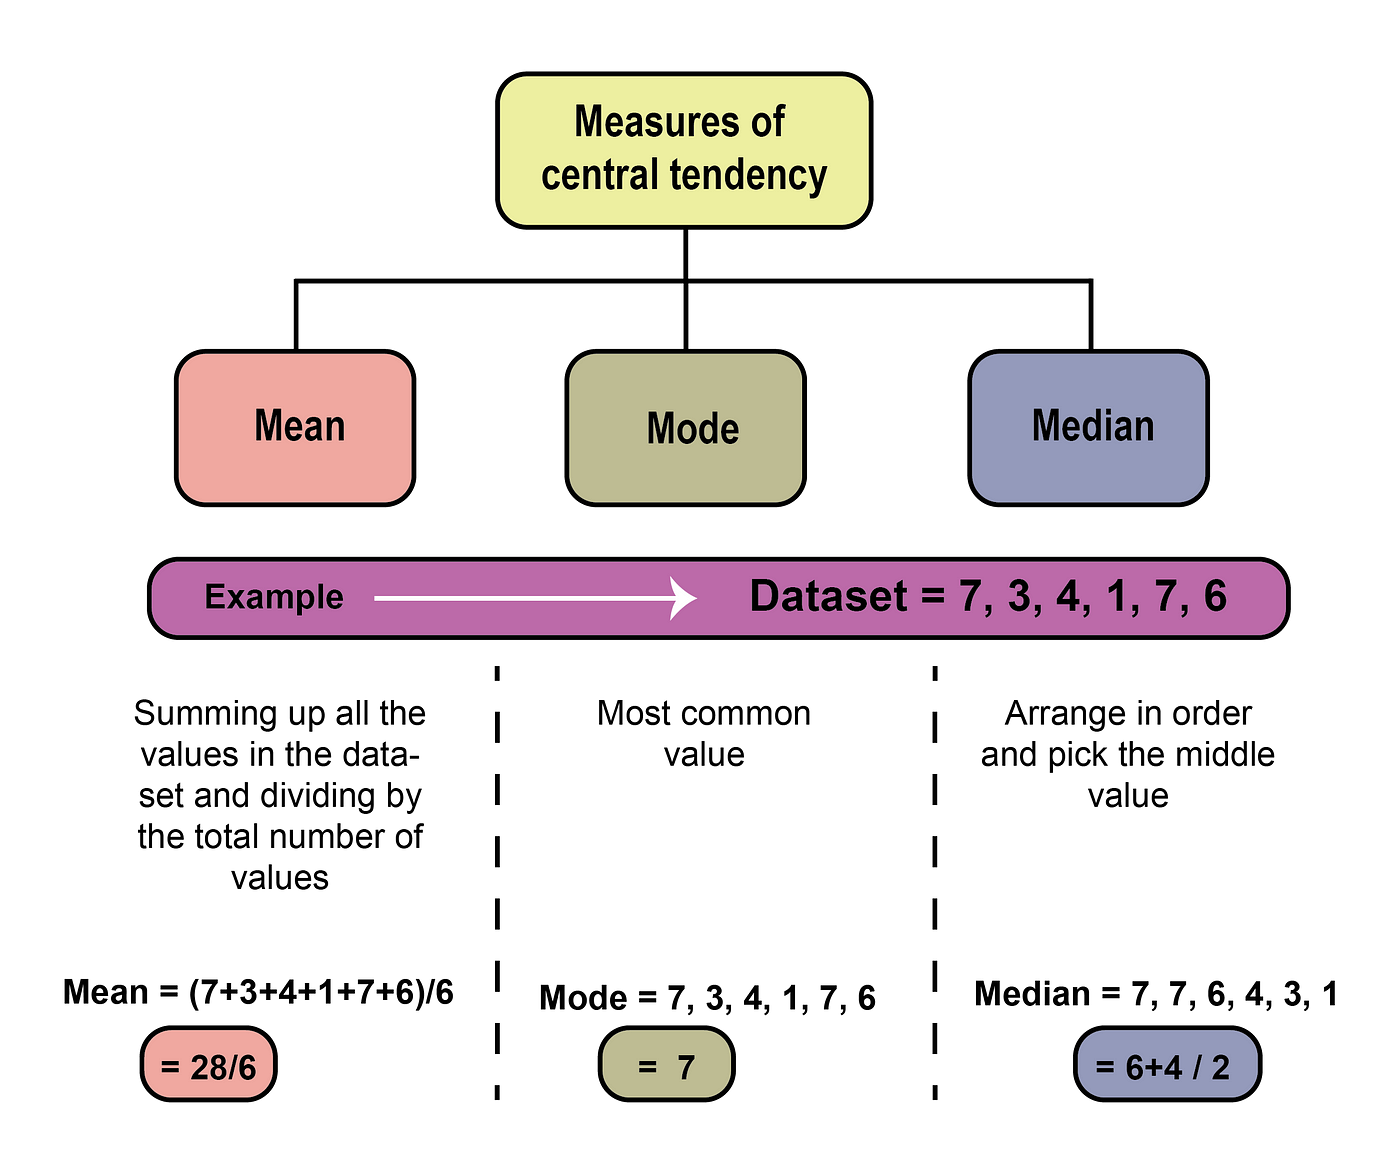

# Variance and Standard Deviation

**Variance and Standard Deviation** are measures of dispersion, indicating how spread out the data is.

- Standard deviation measures the extent to which numbers in a statistical series deviate from their arithmetic mean.
- Variance is the average of the squared deviations from the arithmetic mean and is essentially the square of the standard deviation.



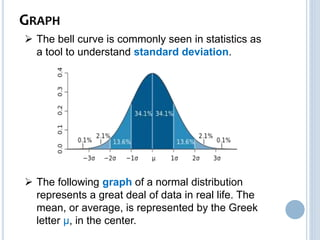

In [ ]:
Image.open(BytesIO(requests.get("https://image.slidesharecdn.com/variancestandarddeviation-170416111818/85/Variance-standard-deviation-10-320.jpg").content))

# Statistical Significance

Tests for statistical significance help us determine whether the observed relationship between two variables is likely to be genuine.

When we say a result is statistically significant, it means it is highly unlikely that the observed data would occur if there were no real effect.

**To determine significance:**
* Researchers decide on a confidence level they are willing to accept, typically 95%. This corresponds to an alpha level of 0.05, meaning they accept a 5% chance of being incorrect.
* Statistical tests provide a p-value, which is compared with the alpha level. If the p-value is less than the alpha, the finding is considered rare and thus significant.

Statistical significance indicates that an effect exists in a study, while **practical significance** demonstrates that the effect is substantial enough to matter in real-world contexts. Statistical significance is measured by p-values, whereas practical significance is reflected by effect sizes.

**Effect size** is the magnitude of the difference between groups.


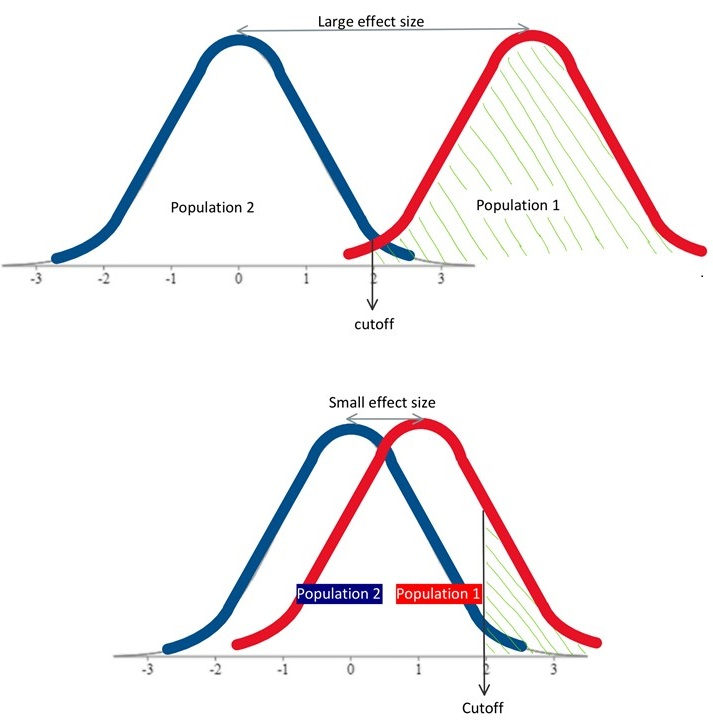

In [ ]:
Image.open(BytesIO(requests.get("https://pressbooks.bccampus.ca/statspsych/wp-content/uploads/sites/1469/2021/08/Fig-11.3.jpg").content))

# Statistical Tests

## Comparing Two Groups (t-test)

**Independent Sample T-test**
- H: SRA students use emails more frequently than RMP students.

In [ ]:
import numpy as np
import scipy.stats as stats

# Data for SRA
SRA = [60, 75, 90, 65, 80]

# Data for RMP
RMP = [45, 50, 55, 70, 60]

# Hypothesis:
# There is a significant difference in email use between SRA and RMP students.

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(SRA, RMP)

# Calculate Effect Size
effect_size = (np.mean(SRA) - np.mean(RMP)) / np.sqrt((np.var(SRA) + np.var(RMP)) / 2)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)
print("Effect Size:", effect_size)

T-Statistic: 2.6255698469621023
P-Value: 0.030386487631710653
Effect Size: 1.856558243265828


- What is the independent variable? Is it categorical or continuous?
- What is the dependent variable? Is it categorical or continuous?
- How many students were sampled in total?
- What is t-statistic?
- What is p-statistics?
- What kind of hypothesis is best to be tested with independent sample t-test?

**Paired Sample T-test**

- H: SRA students will use more emails after they completed the program.

In [ ]:
import scipy.stats as stats

# Data before SRA
before = [60, 75, 90, 65, 80]

# Data after SRA
after = [45, 50, 55, 70, 60]

# Hypothesis:
# There is a significant difference in email use before and after the SRA program.

# Perform paired samples t-test
t_statistic, p_value = stats.ttest_rel(before, after)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 2.7136021011998728
P-Value: 0.05333826104568904


- What is the independent variable? Is it categorical or continuous?
- What is the dependent variable? Is it categorical or continuous?
- How many students were sampled in total?
- What is t-statistic?
- What is p-statistics?
- What kind of hypothesis is best to be tested with paird sample t-test?

## Comparing More than Two Groups (ANOVA)

- H: There is difference in media use across SRA students, RMP students, and TAs.

In [ ]:
from typing_extensions import TypeAlias
import scipy.stats as stats

# Data for SRA students
SRA = [60, 75, 90, 65, 80]

# Data for RMP students
RMP = [45, 50, 55, 70, 60]

# Data for TAs
TA = [70, 75, 80, 85, 90]

# Hypothesis:
# There is a significant difference in media use among the groups.

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(SRA, RMP, TA)

#Calculate Effect Size
all_groups = SRA + RMP + TA
grand_mean = np.mean(all_groups)

SS_between = sum(len(group) * (np.mean(group) - grand_mean)**2 for group in [SRA, RMP, TA])
SS_within = sum(sum((x - np.mean(group))**2 for x in group) for group in [SRA, RMP, TA])
SS_total = SS_between + SS_within

eta_squared = SS_between / SS_total

# Print the results
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)
print("Effect Size (eta-squared):", eta_squared)

F-Statistic: 7.8655462184873945
P-Value: 0.006565769094731132
Effect Size (eta-squared): 0.5672727272727273


- What is the independent variable? Is it categorical or continuous?
- What is the dependent variable? Is it categorical or continuous?
- How many people were sampled in total?
- What is F-statistic?
- What is p-statistics?
- What does ANOVA do NOT tell us?

In [ ]:
# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(SRA, RMP)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 2.6255698469621023
P-Value: 0.030386487631710653


In [ ]:
# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(SRA, TA)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: -0.9370425713316364
P-Value: 0.37615846292177


In [ ]:
# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(TA, RMP)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 4.310527248642598
P-Value: 0.0025788218341366406


## Relationship between Two Variables (Correlation)

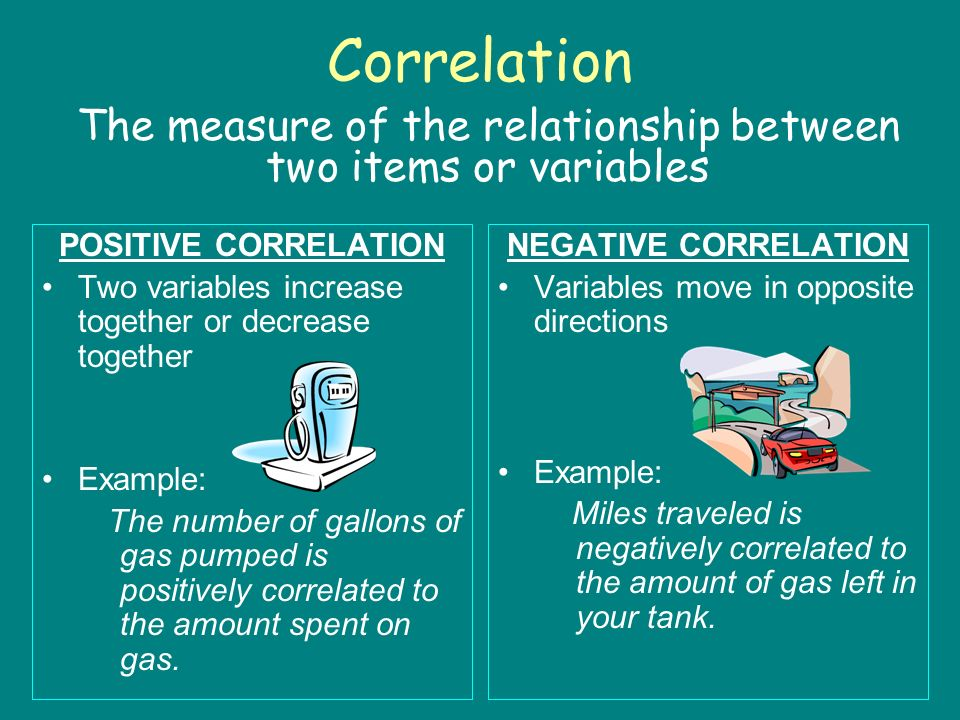

In [ ]:
Image.open(BytesIO(requests.get("https://images.slideplayer.com/25/7864783/slides/slide_3.jpg").content))

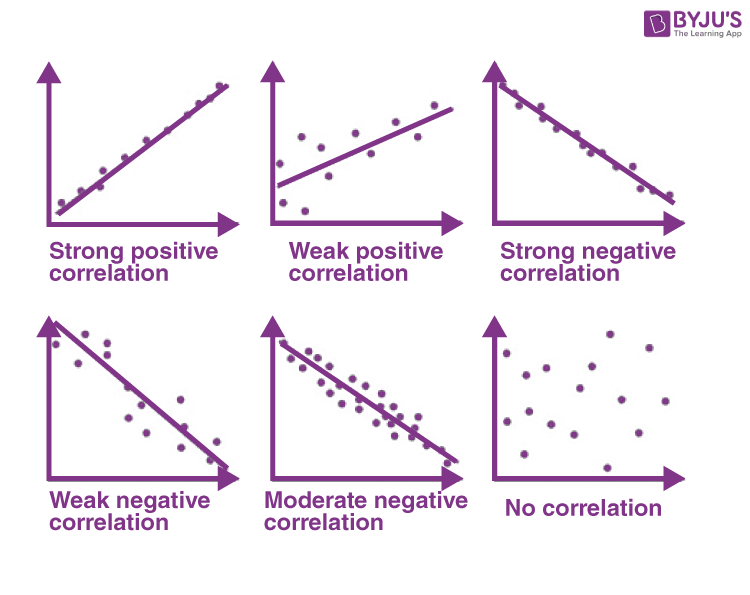

In [ ]:
Image.open(BytesIO(requests.get("https://cdn1.byjus.com/wp-content/uploads/2021/03/Correlation.png").content))

- H: Students will get a higher score when they spend more time reading the course materials

In [ ]:
import scipy.stats as stats

# Reading time in minutes
reading_time = [30, 40, 45, 25, 50, 35, 42, 48, 28, 32]

# Exam scores
exam_scores = [85, 90, 92, 75, 98, 80, 90, 94, 70, 85]

# Calculate the correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(reading_time, exam_scores)

# Print the correlation coefficient and p-value
print("Correlation Coefficient (r):", correlation_coefficient)
print("P-Value:", p_value)

Correlation Coefficient (r): 0.905467515220183
P-Value: 0.0003112897943096367


- What is the independent variable? Is it categorical or continuous?
- What is the dependent variable? Is it categorical or continuous?
- How many people were sampled in total?
- What is r statistic?
- What is p-statistics?
- What does correlation do NOT tell us?

## Relationship between More than Two Variables (Regression)

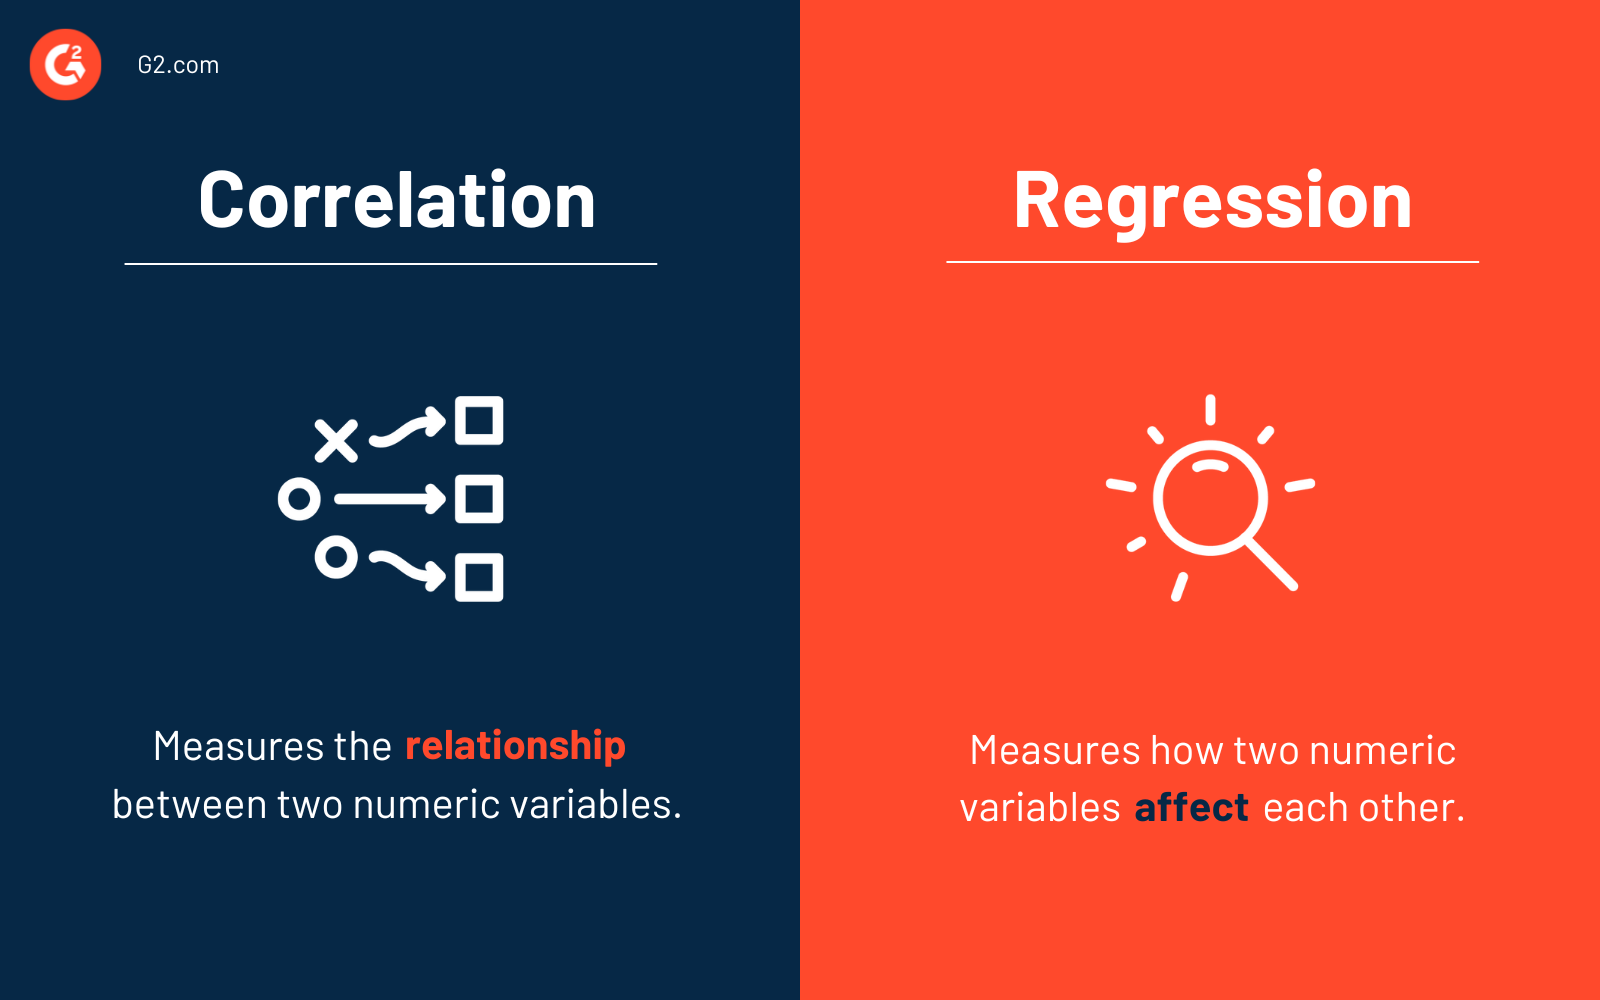

In [ ]:
Image.open(BytesIO(requests.get("https://learn.g2.com/hubfs/Correlation%20vs%20Regression-3.png").content))

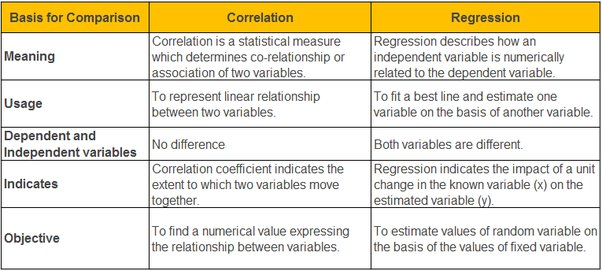

In [ ]:
Image.open(BytesIO(requests.get("https://qph.cf2.quoracdn.net/main-qimg-d3761f1b5c44230504ffce4f47af1a49-pjlq").content))

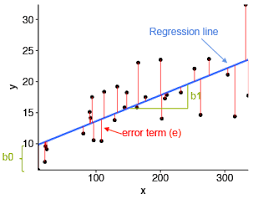

In [ ]:
Image.open(BytesIO(requests.get("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTqLvDC138TGU5FGAQNsie4arEGeFL-7szOaA&s").content))

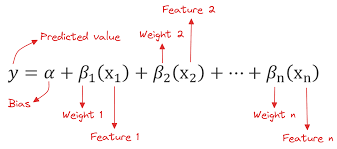

In [ ]:
Image.open(BytesIO(requests.get("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTkxt-zW9N2B1c_goVZPjEmrGoetWyS43EZkA&usqp=CAU").content))

- H: Students will get a higher score when they spend more time reading the course materials
- H: Students will get a higher score when they received a high score on a previous exam
- H: Students will get a higher score when they spend more time discussing with friends

In [ ]:
import numpy as np
import statsmodels.api as sm

# Reading time in minutes
reading_time = [30, 40, 45, 25, 50, 35, 42, 48, 28, 32]

# Previous exam scores
previous_scores = [80, 85, 90, 70, 95, 75, 88, 92, 78, 82]

# Hours of discussion with friends
discussion_hours = [2, 1, 3, 2, 4, 3, 1, 2, 3, 2]

# Exam scores
exam_scores = [85, 90, 92, 75, 98, 80, 90, 94, 70, 85]

# Create a matrix of independent variables
X = np.column_stack((reading_time, previous_scores, discussion_hours))

# Add a constant column to the matrix
X = sm.add_constant(X)

# Create the ordinary least squares (OLS) model
model = sm.OLS(exam_scores, X)

# Fit the model to the data
results = model.fit()

# Show Summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     12.68
Date:                Tue, 02 Jul 2024   Prob (F-statistic):            0.00524
Time:                        07:39:30   Log-Likelihood:                -25.398
No. Observations:                  10   AIC:                             58.80
Df Residuals:                       6   BIC:                             60.01
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.3158     24.613      1.354      0.2

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


- How many independent variables does the regression include?
- What is R-squared?
- What is F-statistics?
- What is Prob (F-statistics)?
- What is coef?
- What is t?
- What is P>|t|?

## A specific case of Regression (Logistic Regression)
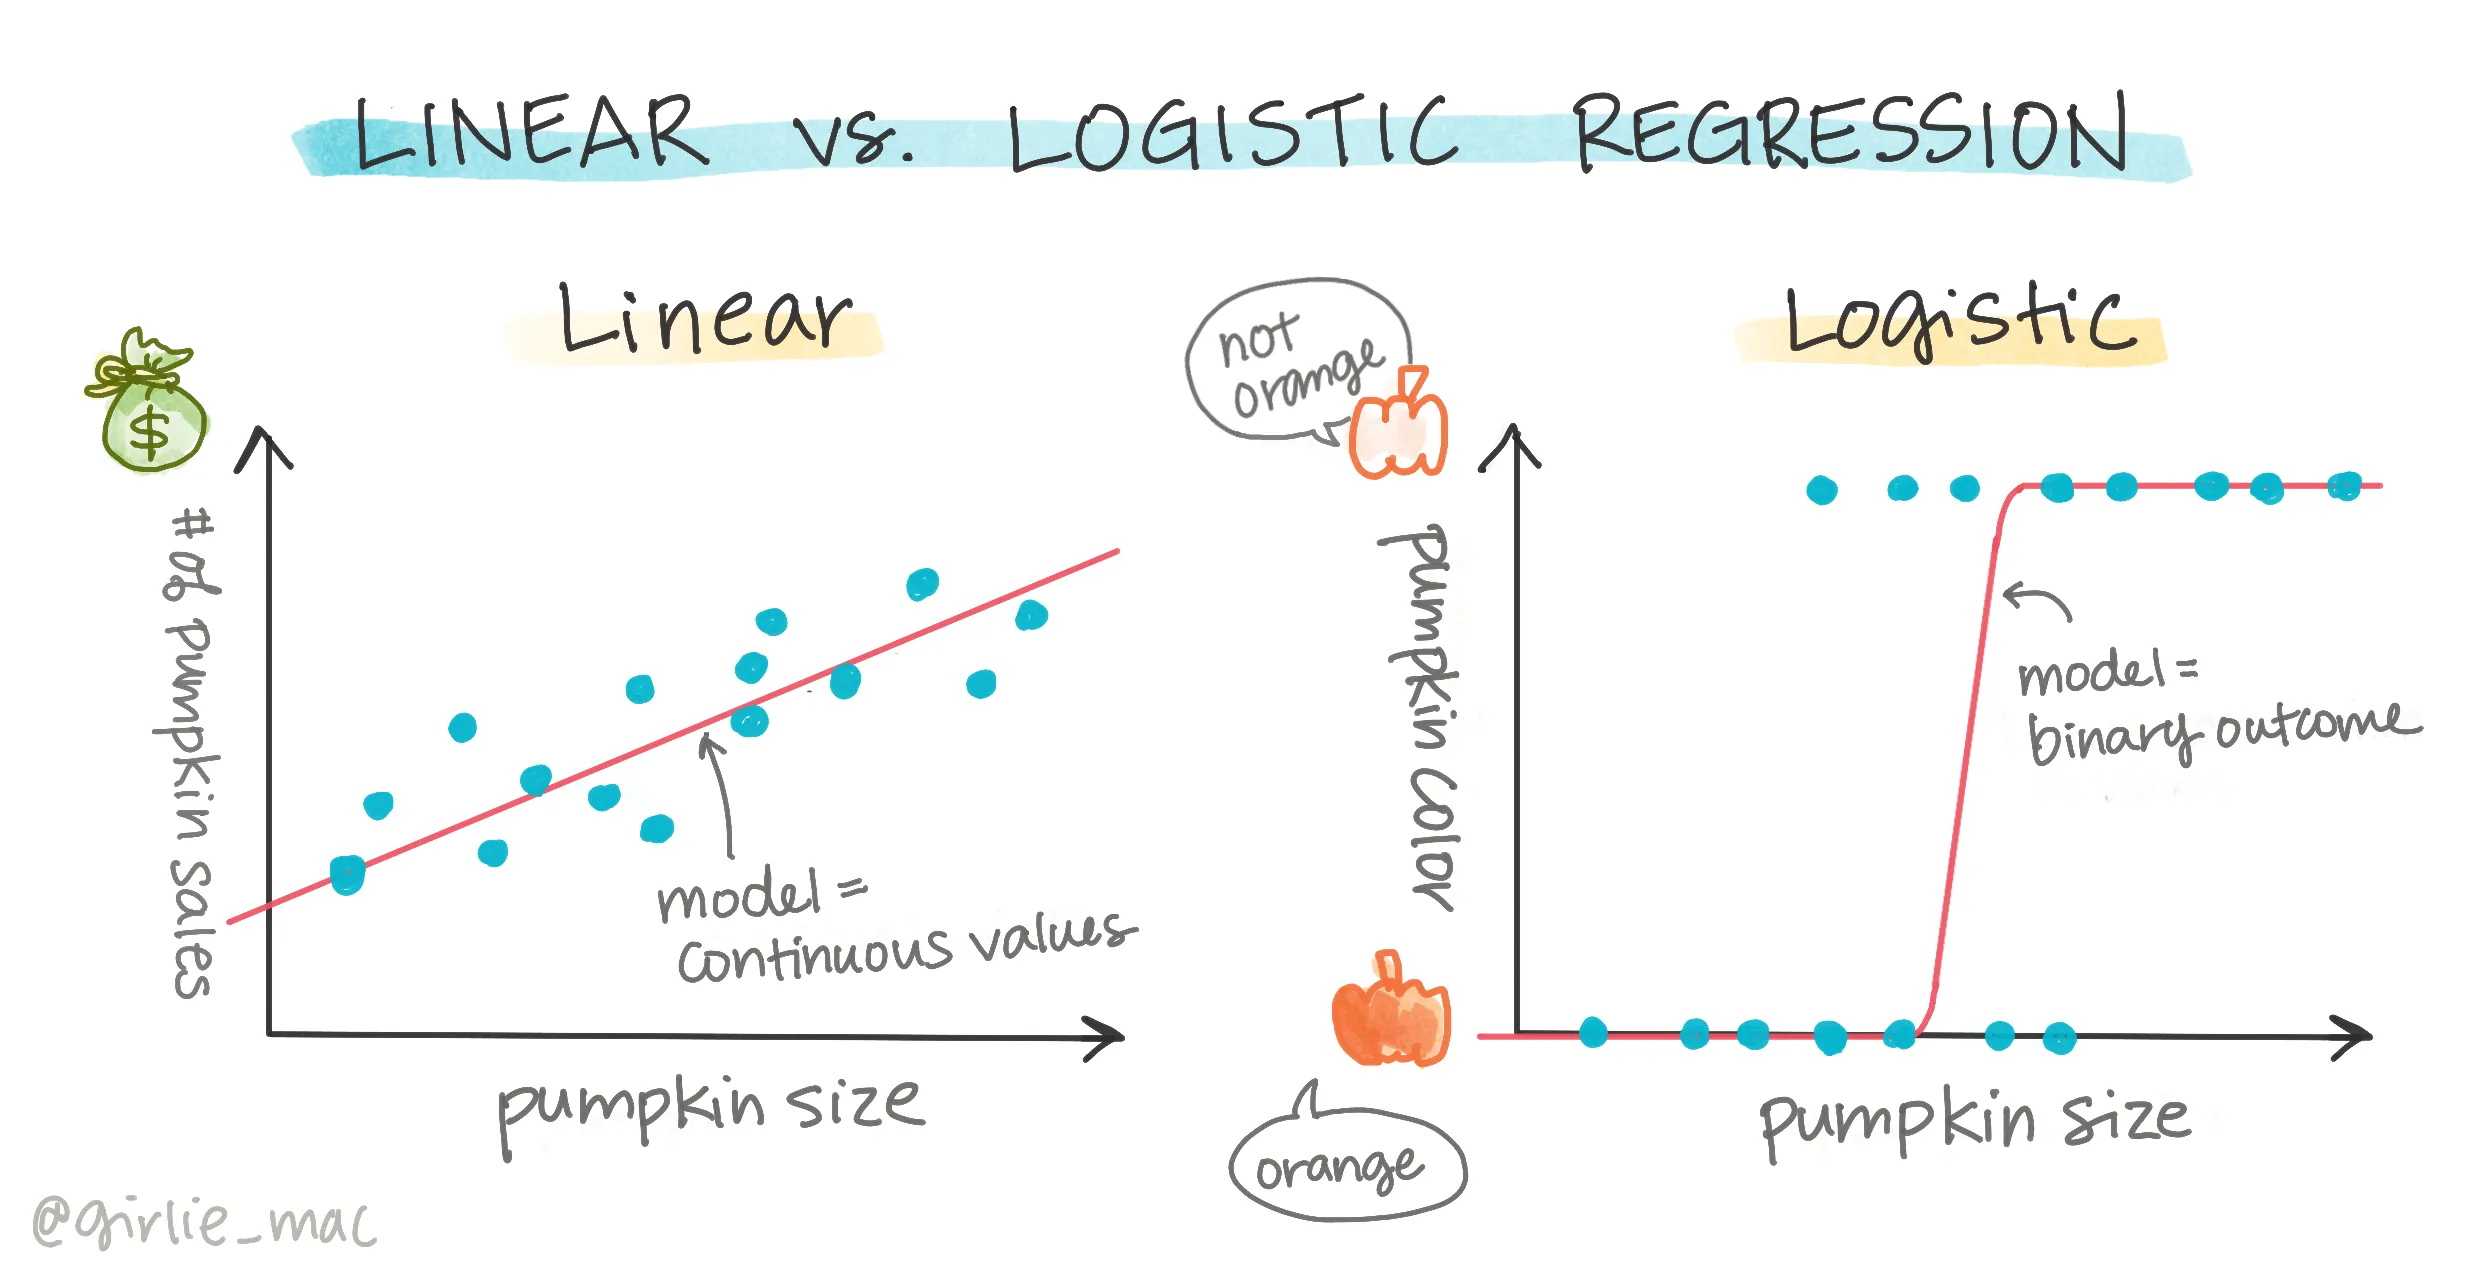

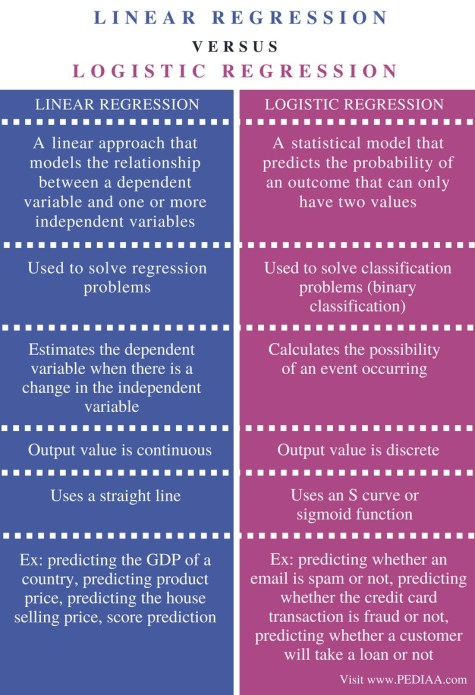

In [ ]:
Image.open(BytesIO(requests.get("https://i0.wp.com/pediaa.com/wp-content/uploads/2018/08/Difference-Between-Linear-Regression-and-Logistic-Regression-Comparison-Summary.jpg?resize=475%2C695").content))

- H: Students will pass when they spend more time reading the course materials
- H: Students will pass when they received a high score on a previous exam
- H: Students will pass when they spend more time discussing with friends


In [ ]:
import numpy as np
import statsmodels.api as sm

# Reading time in minutes
reading_time = [30, 40, 45, 25, 50, 35, 42, 48, 28, 32, 30, 40, 45, 25, 50, 35, 42, 48, 28, 32,30, 40, 45, 25, 50, 35, 42, 48, 28, 32, 30, 40, 45, 25, 50, 35, 42, 48, 28, 32]

# Previous exam scores
previous_scores = [80, 85, 90, 70, 95, 75, 88, 92, 78, 82, 80, 85, 90, 70, 95, 75, 88, 92, 78, 82,80, 85, 90, 70, 95, 75, 88, 92, 78, 82, 80, 85, 90, 70, 95, 75, 88, 92, 78, 82]

# Hours of discussion with friends
discussion_hours = [2, 1, 3, 2, 4, 3, 1, 2, 3, 2, 2, 1, 3, 2, 4, 3, 1, 2, 3, 2,2, 1, 3, 2, 4, 3, 1, 2, 3, 2, 2, 1, 3, 2, 4, 3, 1, 2, 3, 2]

# Exam results (Pass or Fail)
exam_results = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]


# Create a matrix of independent variables
X = np.column_stack((reading_time, previous_scores, discussion_hours))

# Add a constant column to the matrix
X = sm.add_constant(X)

# Create the logistic regression model
model = sm.Logit(exam_results, X)

# Fit the model to the data
results = model.fit()

# Print the summary of results
print(results.summary())

# Get the coefficient estimates
coefficients = results.params

# Get the odds ratios by exponentiating the coefficients
odds_ratios = np.exp(coefficients)

# Print the odds ratios
print("Odds Ratios:")
for i, var in enumerate(['const', 'reading_time', 'previous_scores', 'discussion_hours']):
    print(f"{var}: {odds_ratios[i]}")

Optimization terminated successfully.
         Current function value: 0.436652
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   40
Model:                          Logit   Df Residuals:                       36
Method:                           MLE   Df Model:                            3
Date:                Tue, 02 Jul 2024   Pseudo R-squ.:                  0.3700
Time:                        07:39:31   Log-Likelihood:                -17.466
converged:                       True   LL-Null:                       -27.726
Covariance Type:            nonrobust   LLR p-value:                 0.0001324
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -40.9010     18.115     -2.258      0.024     -76.405      -5.397
x1            -0.4972      0.

## Why Not Causation?

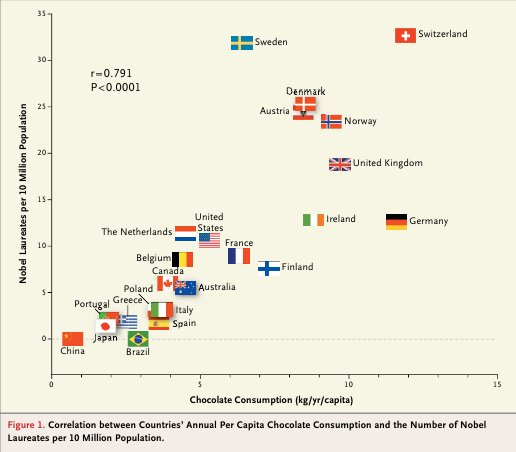

In [ ]:
Image.open(BytesIO(requests.get("https://i.sstatic.net/TWQaB.jpg").content))

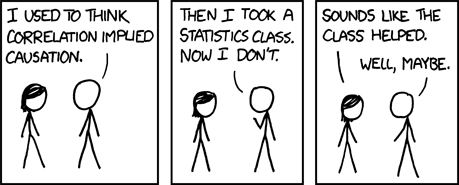